## Bayesian Inference for a Proprtion


* Example: Tokyo Express customers' dining preference  
The owner wants to find out how popular is choice of Friday.


### Step 0: Import necesasry packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import binom, beta, betabinom

### Step 1: Consider the percentage of customers' choice is Friday  
Before giving out the survey, let's consider the possible values and corresponding probablities of $p$

In [2]:
prior_values = np.array([0.3, 0.4, 0.5, 0.6, 0.7, 0.8])
prior_probs = np.array([0.125, 0.125, 0.250, 0.250, 0.125, 0.125])

Note that probabilities are reasonable due to **Axioms of Probability**  
1. For any event $A$, $P(A) \in [0, 1]$
2. $P(U)=1$
3. If $A_i$ and $A_j$ are disjoint, $P(A_i \cup A_j)=P(A_i)+P(A_j)$

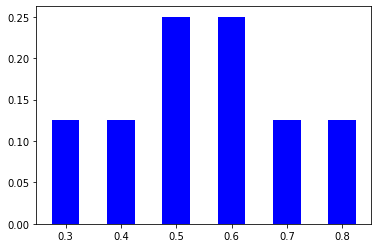

In [3]:

plt.bar(prior_values, prior_probs, color='blue', width=0.05)
plt.show()

### Step 2: Collect the data and Compute the likelihood of $p$  
Out of the 20 responses, 12 say that their favorite day for eating out for dinner is Friday.  
Quantitiy of interest: $p$, unknown, we're trying to make a inference about it!

In [4]:
n = 20
y = 12


* **The Binomial Distribution**  
1. One is repeating the same basic task $n$ times
2. 2 outcomes - *success* or *failure*
3. The probability of of *success* is always $p$
4. The results of outcomes from different trials are independent


Do you think that the survey is a Binomial Experiment?
1. 20 people
2. *success*: Choose Friday
3. For simplicity, let's assume that people answered independently

$$P(Y=k)={n \choose k}p^k(1-p)^{n-k}, k=0,...,n$$
* **Likelihood**  
a function of unknown quantity of interest. After collecting data, in this case,
$$L(p) = {20 \choose 12}p^k(1-p)^{n-k}$$
$Y:$ even though it is the random variable, but once we observed the data, it is now **fixed!**  

In Bayesian Inference, we assume that data is fixed and parameter is unknown. We only need $n, k$ and possible values of $p$ when computing the likelihood function. Note that we don't need $\pi_{\text{owner}}(p)$

In [5]:
likelihoods = binom.pmf(y, n, prior_values)

result = np.transpose(np.array([prior_values, prior_probs, likelihoods]))
df = pd.DataFrame(result, columns = ['p','prior','likelihood'])
print(df)

     p  prior  likelihood
0  0.3  0.125    0.003859
1  0.4  0.125    0.035497
2  0.5  0.250    0.120134
3  0.6  0.250    0.179706
4  0.7  0.125    0.114397
5  0.8  0.125    0.022161


### Step 3: Compute posterior distribution

$$\pi(p_i|y)=\frac{\pi(p_i) \times L(p)}{\sum_{j}{\pi(p_j) \times L(p_j)}}$$

In [6]:
products = likelihoods * prior_probs
sum_p = np.sum(products)
posterior_probs = products / sum_p

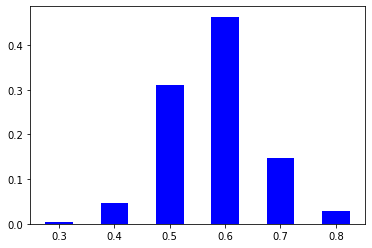

In [7]:
plt.bar(prior_values, posterior_probs, color='blue', width=0.05)
plt.show()

In [8]:
likelihoods = binom.pmf(y, n, prior_values)
result = np.transpose(np.array([prior_values, prior_probs, likelihoods, products, posterior_probs]))
df = pd.DataFrame(result, columns = ['p','prior','likelihood', 'product', 'posterior'])
print(df)

     p  prior  likelihood   product  posterior
0  0.3  0.125    0.003859  0.000482   0.004976
1  0.4  0.125    0.035497  0.004437   0.045768
2  0.5  0.250    0.120134  0.030034   0.309786
3  0.6  0.250    0.179706  0.044926   0.463401
4  0.7  0.125    0.114397  0.014300   0.147496
5  0.8  0.125    0.022161  0.002770   0.028573


## Continuous prios - the Beta distribution

\* *From [wikipedia](https://en.wikipedia.org/wiki/Beta_distribution#Bayesian_inference)*  

The Bayesian inference, the beta distribution is the **conjugate prior probability distribution** for the **Bernoulli**, **binomial**, **negative binomial** and **geometric distributions**. It is a suitable model for the random behavior of percentage and proportions.

---
The prior and posterior are called **conjugate distributions** if those are in the same distribution family, and such prior is called **conjugate prior**.

* Advantages:
1. Closed-form expression (algebraic expression). Without conjugate prior, numerical integral may be necessary
2. Conjugate prior may give some intuition such as how likelihood funcion updates a prior distribution
---

For $0 \leq x \leq 1, \alpha, \beta > 0$

$$f(x;\alpha,\beta)=\frac{1}{B(\alpha,\beta)}x^{\alpha-1}(1-x)^{\beta-1} $$

### Properties
1. **Mode**: The most likely value of the distribution  
If $\alpha, \beta>1$, 
$$\frac{\alpha-1}{\alpha+\beta-2}$$  
If not, it indicates **anti-mode**, the lowest point of the pdf  

2. **Mean(Expectation)**:
$$\frac{\alpha}{\alpha+\beta}$$
3. **Variance**:
$$\text{var}(X)=\frac{\alpha\beta}{(\alpha+\beta)^2(\alpha+\beta+1)}$$

### Bayesian Inference
* $a, b$ represents how many **prior successes / failures** you think that there should be
* $a+b$ shows how strong the prior assumption is.

### Examples of Beta Curves

In [9]:
def draw_beta(a, b):
    x = np.linspace(beta.ppf(0.00001, a, b), beta.ppf(0.99999, a, b), 100)
    fig, ax = plt.subplots(1, 1, figsize=(9, 6))
    plt.plot(x, beta.pdf(x, a, b), lw=3)
    plt.title(f'Beta({a},{b})')
    plt.show()
    

In [10]:
beta_params = np.array([[(0.5, 0.5), (0.5, 1), (0.5, 2)], 
                        [(1, 0.5), (1, 1), (1, 2)],
                        [(4,0.5), (4,1), (4,2)]], 
                       )

(3, 3, 2)


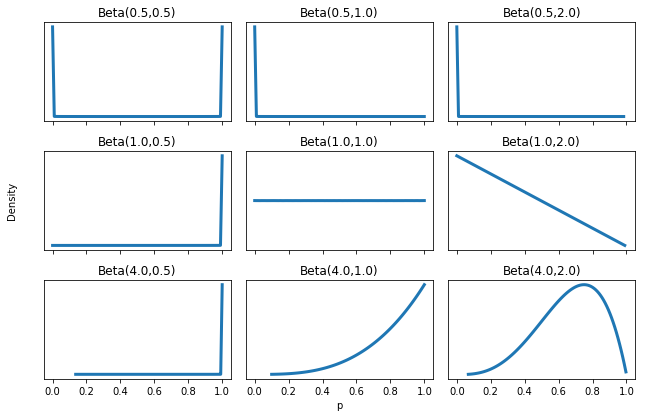

In [11]:
print(beta_params.shape)

len_x, len_y, _ = beta_params.shape
fig, axs = plt.subplots(len_x, len_y, sharex = True, figsize=(9,6))
fig.add_subplot(111, frameon=False)
for i, j in np.ndindex((len_x, len_y)):
    a, b = beta_params[i, j]
    # returns evenly spaced numbers over a specificed interval
    x = np.linspace(beta.ppf(0.0001, a, b), beta.ppf(0.9999, a, b), 100)
    axs[i, j].plot(x, beta.pdf(x, a, b), lw=3)
    axs[i, j].set_title(f'Beta({a},{b})')
    axs[i, j].get_yaxis().set_visible(False)

fig.tight_layout()
plt.tick_params(labelcolor='none', which='both', top=False, bottom=False, left=False, right=False)
plt.xlabel('p')
plt.ylabel('Density')
plt.show()

### How to choose a Beta curve to represent prior opinions?

* Specify a Beta prior by specification of quantiles of the distribution  

*quantile:* are about rank order of values. ex) middle quantile = medium

In [12]:
def beta_select(quantile1, quantile2):
    def betaprior1(K, x, p):
        def bisection_search(k, x, p):
            EPS = 0.0001
            lo = 0
            hi = 1.0
            flag = False
            while (flag == False):
                mid = (lo + hi) / 2.0
                p0 = beta.cdf(x, k * mid, k * (1 - mid))
                if (p0 < p):
                    hi = mid
                else:
                    lo = mid
                if abs(p0 - p) < EPS:
                    flag = True
            return mid
        
        return np.array([bisection_search(k, x, p) for k in K])
    
    p1 = quantile1['p']
    x1 = quantile1['x']
    p2 = quantile2['p']
    x2 = quantile2['x']
    
    logK = np.linspace(-3, 8, num=100)
    K = np.exp(logK) # sum of two shape parameters (sample size)
    mids = betaprior1(K, x1, p1)
    
    prob2 = beta.cdf(x2, K * mids, K * (1 - mids))
    cond = [(prob2 > 0) & (prob2 < 1)]
    prob2 = np.extract(cond, prob2)
    logK = np.extract(cond, logK)
    K0 = np.exp(np.interp(p2, prob2, logK))
    K0 = np.array(K0, ndmin=1)
    m0 = betaprior1(K0, x1, p1)    
    return np.round(K0 * m0, 2), np.round(K0 * (1 - m0), 2)

In [13]:
# cdf(0 to 50th quantile) = 0.55
a, b = beta_select({'p': 0.5, 'x': 0.55}, {'p': 0.9, 'x': 0.80})
a, b = float(a), float(b)

### Updating the beta prior

* prior: beta
$$p \sim \mathcal{B}(a,b)$$
* likelihood: binomial, $n$ and $y$ are fixed after the observation
$$Y \sim B(n,p)$$
* posterior: beta, it becomes the **moving average between sample mean and prior mean**
$$p \sim \mathcal{B}(a+y,b+n-y)$$

$$E(p|y)=\frac{a+y}{a+b+n}=\frac{a}{a+b}\times\frac{a+b}{a+b+n}+\frac{y}{n}\times\frac{n}{a+b+n}$$

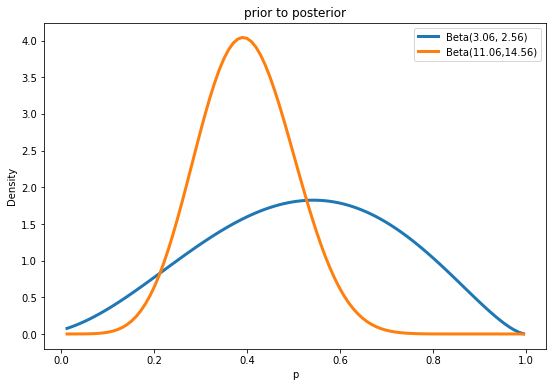

In [14]:
y, n = 8, 20

x_axis = np.linspace(beta.ppf(0.00001, a, b), beta.ppf(0.99999, a, b), 100)
fig, ax = plt.subplots(1, 1, figsize=(9, 6))
plt.plot(x_axis, beta.pdf(x, a, b), lw=3, label=f'Beta({a:.2f}, {b:.2f})')
plt.plot(x_axis, beta.pdf(x, a+y, b+n-y), lw=3, label=f'Beta({a+y:.2f},{b+n-y:.2f})')
plt.legend()
plt.xlabel('p')
plt.ylabel('Density')
plt.title('prior to posterior')
plt.show()

## Bayesian inference with continuous priors
### Bayesian hypothesis testing  
Suppose one of the Toyko Express workers claims that at least 75% fo the customers prefer Friday. *Is this a reasonable claim?* From a Bayesian viewpoint,
* Find the posterior probability that $p\geq0.75$
* Make a decision based on the value of the posterior probability:
* If the probability is small, we can reject this claim

If the posterior is known and well defined, calculate directly or use Monte-Carlo Simulation

In [15]:
def beta_area_cdf(lo, hi, a, b):
    return beta.cdf(hi, a, b) - beta.cdf(lo, a, b)

def beta_area_mcs(lo, hi, a, b):
    sample_size = 50000
    samples = np.random.random(sample_size)
    beta_samples = beta.ppf(samples, a, b)
    return sum(lo <= beta_samples) / sample_size
    


In [16]:
a = 15.06
b = 10.56
print(f'cdf: {beta_area_cdf(0.75, 1.0, a, b):.4f}')
print(f'mcs: {beta_area_mcs(0.75, 1.0, a, b):.4f}')

cdf: 0.0397
mcs: 0.0391


### Bayesian credible intervals 
A 90% Bayesian credible interval is an interval contains 90% of the posterior probablity

**Note - confident interval in frequentist:**  
If we repeat this process large number of time, then 95% of the outcomes(confident intervals) will cover the truth.

In [17]:
def beta_interval_mid(p, a, b):
    assert 0 <= p and p <= 1
    t = (1 - p) / 2
    s = beta.ppf(t, a, b)
    e = beta.ppf(1 - t, a, b)
    x_axis = np.linspace(beta.ppf(1e-9, a, b), beta.ppf(1 - 1e-9, a, b))
    plt.plot(x_axis, beta.pdf(x_axis, a, b), lw=3)
    plt.axvspan(s, e, color='red')
    plt.xlabel('p')
    plt.ylabel('Density')
    plt.title(f'{int(p*100)}% credible interval of Beta({a:.2f}, {b:.2f})')
    plt.show()
    print(f'{s:.3f} <= p <= {e:.3f}')

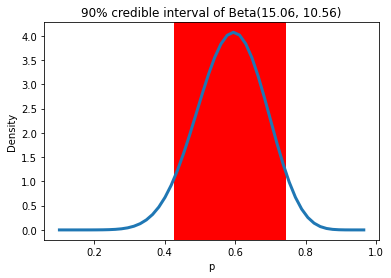

0.427 <= p <= 0.741


In [18]:
beta_interval_mid(0.9, a, b)

### Bayesian prediction  
Outcome values simulated from the posterior predictive distribution, which is the distribution of the unobserved (future) data given the observed data. They can be used as optimal predictors in forecasting, inputations for missing data, and more. They are also important for checking *model goodness of fit*.

---

Suppose the Toyko Express owner gives out another survey to $m$ customers, how many would prefer Friday?  
Let $Y$ be a random variable representing (maybe future) data. We have a parameteric model for $Y$ with $Y \sim f(y|\theta), \theta \in \Theta$, where $\Theta$ is the parameter space and prior distribution as $\pi(\theta)$.
* The *prior predictive distribution* of $Y$: $$f(y)=\int_{\Theta}{f(y|\theta)\pi(\theta)d\theta}$$  
It is a collection of data sets generated from the model(the likelihood and parameters). This tells you what data$(Y)$ you expect to see before learning more about $\theta$.
* The posterior-predictive distribution: $$p(\tilde{y}|y)=\int{p(\tilde{y},\theta|y)d\theta}=\int{p(\tilde{y}|\theta)p(\theta|y)d\theta}$$  
After we have seen the data and obtained the posterior distributions of the parameters, we can now *use* the posterior distributions to generate futrue data from the model. In other words, it gives us some indication of what future data might look like. We get some approximation by simulation. In this example,  
$$\text{sample }p \sim \mathcal{B}(a+y,b+n-y) \rightarrow \text{sample } \tilde{y} \sim B(m,p)$$

reference:  
https://stats.stackexchange.com/questions/394648/differences-between-prior-distribution-and-prior-predictive-distribution  
https://vasishth.github.io/bayescogsci/book/sec-ppd.html  

From [Wikipedia](https://en.wikipedia.org/wiki/Beta-binomial_distribution),  
* (The exact prediction): Beta-binomial distribution $f(k|n,\alpha,\beta)$,  
the binomial distribution in which the probability of success at each of $n$ trials is not fixed but randomly drawn from a beta distribution


In [19]:
np.random.seed(seed=1234)

sample_size = 1000

a = 3.06
b = 2.56

n = 20
y = 12

m = 20
pred_p_sim = beta.rvs(a + y, b + n - y, size=sample_size)
pred_y_sim = []
for p in pred_p_sim:
    pred_y_sim.append(binom.rvs(m, p))
pred_y_sim = np.array(pred_y_sim)
sim = pred_y_sim
# what is the probability that predictive number of successes lies on betwwen 5 and 15?
sim_result = (pred_y_sim >= 5) & (pred_y_sim <= 15)
print(f'result by simulation: {sum(sim_result) / sample_size:.4f}')

# exact solution by beta-binomal distribution!
ext = betabinom.rvs(m, a + y, b + n - y, size=sample_size)
ext_result = (ext >= 5) & (ext <= 15)
print(f'result by simulation: {sum(ext_result) / sample_size:.4f}')

result by simulation: 0.8910
result by simulation: 0.8880


**Compare results:**

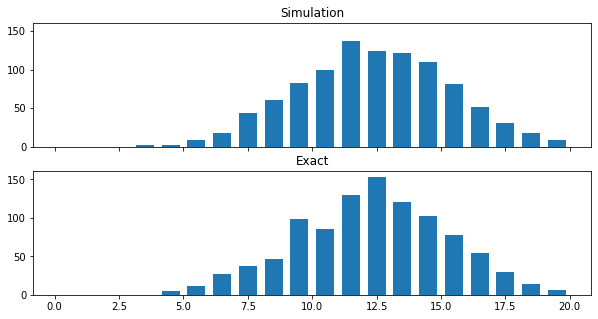

In [20]:
fig, ax = plt.subplots(2, 1, sharex = True, sharey=True, figsize=(10, 5))
x_axis = np.linspace(0, 20, 21)
ax[0].hist(ext, bins=x_axis, rwidth=0.7)
ax[0].set_title('Simulation')
ax[1].hist(sim, bins=x_axis, rwidth=0.7)
ax[1].set_title('Exact')

plt.show()

### Posterior predictive checking  

*Sometimes, we make new prediction and then check our **original observation** against the prediction to see how well our model is doing.*  

$$\text{sample }p \sim \mathcal{B}(a+y,b+n-y) \rightarrow \text{sample } \tilde{y} \sim B(n,p)$$  

The sample $\{\tilde{y}^{(1)}, \tilde{y}^{(2)}, ..., \tilde{y}^{(S)}\}$ is an approximation to the posterior predictive distribution that can be used for model checking. Frequent observations of extreme values from the simulation indicate that the model is not good (or stable)  

The observed value of $y$ is consistent with simulations of replicated data from this predictive distribution.


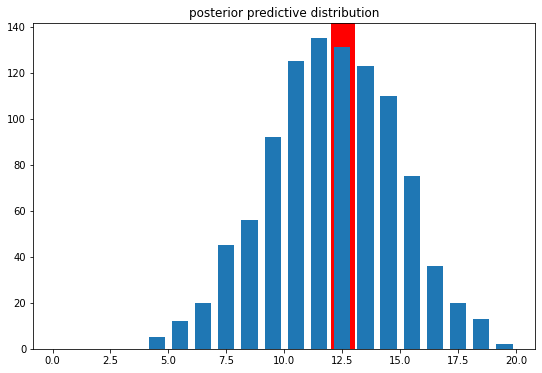

In [21]:
pred_p_sim = beta.rvs(a + y, b + n - y, size=sample_size)
pred_y_sim = []
for p in pred_p_sim:
    pred_y_sim.append(binom.rvs(n, p))
pred_y_sim = np.array(pred_y_sim)
sim = pred_y_sim

plt.figure(1, figsize=(9, 6))
# on y=12
plt.axvspan(12, 13, color='red')
plt.hist(sim, bins=x_axis, rwidth=0.7)
plt.title('posterior predictive distribution')

plt.show()

If either $p(y>\tilde{y}|y)$ or $p(y<\tilde{y}|y))$ is small, it suggest that the model does not describe $y$ very well.

In [22]:
print(sum(sim > y) / sample_size)

0.379
